# Trade Generator

In [1]:
import pandas as pd
import numpy as np
from portfolio_optimization.portfolio.rebalancing import *

980.0


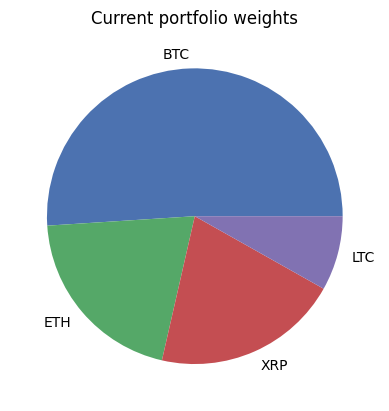

In [2]:
# Current portfolio
portfolio = pd.Series([0.05, 0.2, 400, 0.8], index=['BTC', 'ETH', 'XRP', 'LTC'])

prices = pd.Series([10000, 1000, 0.5, 100], index=['BTC', 'ETH', 'XRP', 'LTC'])

# Plot weights of the portfolio, based on the current prices
weights = portfolio * prices
weights.plot(kind='pie', title='Current portfolio weights')

print(weights.sum())

# Rebalance Simulation

In [3]:
new_target_weights = pd.Series([0.25, 0.25, 0.25, 0.25], index=['BTC', 'ETH', 'XRP', 'LTC'])

# Weight Assets is a list of tuple such that (min, ideal, max). For now, min and max are ± 10% of ideal
weight_assets = [(
    new_target_weights[i], # - 0.1 * new_target_weights[i],
    new_target_weights[i],
    new_target_weights[i], # + 0.1 * new_target_weights[i]
) for i in new_target_weights.index]

# Order size Assets is a list of tuple such that (minOrderSize, maxOrderSize). For now, min and max are [0, 10000]
order_size_assets = [(50, 1000) for i in new_target_weights.index]

tbd = 0
orders = totalOrders(
    amountAsset=np.array(portfolio),
    priceAsset=np.array(prices),
    orderSizeAssets=np.array(order_size_assets),
    weightAssets=np.array(weight_assets),
    TBDAmount=tbd
)

sizes = orderSize(
    amountAsset=np.array(portfolio),
    priceAsset=np.array(prices),
    orderSizeAssets=np.array(order_size_assets),
    weightAssets=np.array(weight_assets),
    TBDAmount=tbd
)

buySell = buyINDAsset(
    amountAsset=np.array(portfolio),
    priceAsset=np.array(prices),
    orderSizeAssets=np.array(order_size_assets),
    weightAssets=np.array(weight_assets),
    TBDAmount=tbd
)

trades = orders * sizes

trades

array([-255.,    0.,    0.,  165.])

890.0


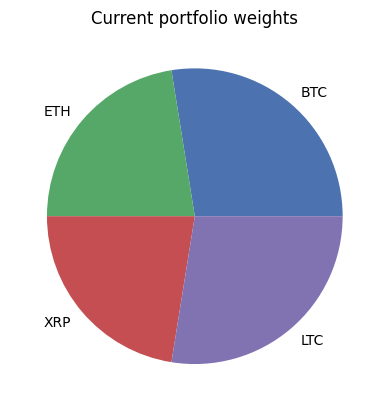

In [4]:
# Execute the trades

portfolio = portfolio + trades / prices

value = portfolio * prices
value.plot(kind='pie', title='Current portfolio weights')

print(value.sum())

# Bug
As seen above, without changing the price, the rebalance simulation lost money, which should not happen. Here is a traceback of all the parameters used for the computation.

In [5]:
# Traceback
df = pd.DataFrame()

df['minMaxCurrentDifAsset'] = minMaxCurrentDifAsset(amountAsset=np.array(portfolio), priceAsset=np.array(prices), weightAssets=np.array(weight_assets), TBDAmount=tbd)
df['rebalanceDelta'] = rebalanceDeltaAsset(amountAsset=np.array(portfolio), priceAsset=np.array(prices), weightAssets=np.array(weight_assets), TBDAmount=tbd)
df['rebalanceDeltaTotal'] = rebalanceDeltaTotalAsset(amountAsset=np.array(portfolio), priceAsset=np.array(prices), weightAssets=np.array(weight_assets), TBDAmount=tbd)
df['rebalanceMinSizeDelta'] = rebalanceMinSizeDeltaAsset(amountAsset=np.array(portfolio), priceAsset=np.array(prices), orderSizeAssets=np.array(order_size_assets), weightAssets=np.array(weight_assets), TBDAmount=tbd)
df['rebalanceMinSizeDeltaTotal'] = rebalanceMinSizeDeltaTotalAsset(amountAsset=np.array(portfolio), priceAsset=np.array(prices), orderSizeAssets=np.array(order_size_assets), weightAssets=np.array(weight_assets), TBDAmount=tbd)
df['buyINDAsset'] = buyINDAsset(amountAsset=np.array(portfolio), priceAsset=np.array(prices), orderSizeAssets=np.array(order_size_assets), weightAssets=np.array(weight_assets), TBDAmount=tbd)
df['totalBuyOrder'] = totalbuyOrderAsset(amountAsset=np.array(portfolio), priceAsset=np.array(prices), orderSizeAssets=np.array(order_size_assets), weightAssets=np.array(weight_assets), TBDAmount=tbd)
df['totalSellOrder'] = totalsellOrderAsset(amountAsset=np.array(portfolio), priceAsset=np.array(prices), orderSizeAssets=np.array(order_size_assets), weightAssets=np.array(weight_assets), TBDAmount=tbd)
df['maxToMinRank'] = maxToMinRankAsset(amountAsset=np.array(portfolio), priceAsset=np.array(prices), weightAssets=np.array(weight_assets), TBDAmount=tbd)
df['minToMaxRank'] = minToMaxRankAsset(amountAsset=np.array(portfolio), priceAsset=np.array(prices), weightAssets=np.array(weight_assets), TBDAmount=tbd)
df['assetCapRank'] = assetCapRankAsset(amountAsset=np.array(portfolio), priceAsset=np.array(prices), orderSizeAssets=np.array(order_size_assets), weightAssets=np.array(weight_assets), TBDAmount=tbd)
df['assetRawCapFilled'] = rawCapFilledAsset(amountAsset=np.array(portfolio), priceAsset=np.array(prices), orderSizeAssets=np.array(order_size_assets), weightAssets=np.array(weight_assets), TBDAmount=tbd)
df['assetCapToFill'] = capToFillAsset(amountAsset=np.array(portfolio), priceAsset=np.array(prices), orderSizeAssets=np.array(order_size_assets), weightAssets=np.array(weight_assets), TBDAmount=tbd)
df['minOrder'] = minOrderAsset(amountAsset=np.array(portfolio), priceAsset=np.array(prices), orderSizeAssets=np.array(order_size_assets), weightAssets=np.array(weight_assets), TBDAmount=tbd)
df['additionalOrder'] = additionalOrdersAsset(amountAsset=np.array(portfolio), priceAsset=np.array(prices), orderSizeAssets=np.array(order_size_assets), weightAssets=np.array(weight_assets), TBDAmount=tbd)
df['totalOrders'] = totalOrders(amountAsset=np.array(portfolio), priceAsset=np.array(prices), orderSizeAssets=np.array(order_size_assets), weightAssets=np.array(weight_assets), TBDAmount=tbd)
df['orderSizes'] = orderSize(amountAsset=np.array(portfolio), priceAsset=np.array(prices), orderSizeAssets=np.array(order_size_assets), weightAssets=np.array(weight_assets), TBDAmount=tbd)


df.index = portfolio.index

df

,minMaxCurrentDifAsset,rebalanceDelta,rebalanceDeltaTotal,rebalanceMinSizeDelta,rebalanceMinSizeDeltaTotal,buyINDAsset,totalBuyOrder,totalSellOrder,maxToMinRank,minToMaxRank,assetCapRank,assetRawCapFilled,assetCapToFill,minOrder,additionalOrder,totalOrders,orderSizes
BTC,-22.5,-22.5,-45.0,22.5,45.0,0.0,2.0,2.0,3.0,0.0,0,0.0,-22.5,0.0,0.0,0.0,-22.5
ETH,22.5,0.0,-45.0,0.0,45.0,1.0,2.0,2.0,1.0,3.0,3,22.5,22.5,0.0,0.0,0.0,22.5
XRP,22.5,0.0,-45.0,0.0,45.0,1.0,2.0,2.0,1.0,3.0,3,22.5,22.5,0.0,0.0,0.0,22.5
LTC,-22.5,-22.5,-45.0,22.5,45.0,0.0,2.0,2.0,2.0,1.0,1,-22.5,-22.5,0.0,0.0,0.0,-22.5
